In [2]:
import pandas as pd
# Import and clean data
board_games = pd.read_csv("board_games.csv")
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games["users_rated"] > 0]

board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

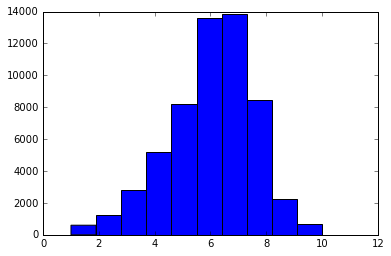

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a histogram of the average ratings
plt.hist(board_games["average_rating"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f34bd625c18>],
 'caps': [<matplotlib.lines.Line2D at 0x7f34bd62cf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34bd639ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f34bd631f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f34bd625da0>,
  <matplotlib.lines.Line2D at 0x7f34bd62ce10>]}

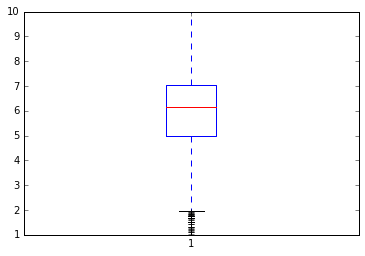

In [4]:
# Generate a box plot
plt.boxplot(board_games["average_rating"].values)

In [5]:
# Get Std Deviation and Mean
avg_rating_std = board_games["average_rating"].std()
avg_rating_mean = board_games["average_rating"].mean()
print(avg_rating_std)
print(avg_rating_mean)

1.57882993483
6.01611284933


I would suggest using mean squared error metric the because the data follows a normal distribution and the data is  continuous.

In [6]:
from sklearn.cluster import KMeans
# 
kmeans_model = KMeans(n_clusters= 5)
# List column names
column_list = list(board_games.columns)
# Remove Name, id, type
column_list.remove("name")
column_list.remove("id")
column_list.remove("type")
# Filter board_games to only numeric columns  
numeric_columns = board_games[column_list]

# Fit the KMeans class to numeric columns
kmeans_model.fit(numeric_columns)
# Extract the labels_attribute of the KMeans class, and assign to the variable labels.
labels = kmeans_model.labels_

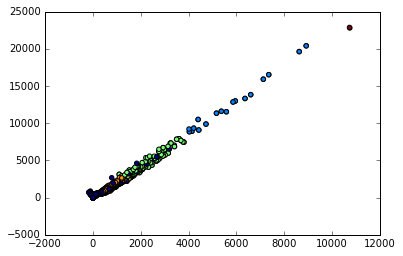

In [7]:
import numpy as np
game_mean = numeric_columns.apply(np.mean, axis=1)
game_std =  numeric_columns.apply(np.std, axis=1)
plt.scatter(game_mean,game_std, c = labels)

In [8]:
numeric_columns

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


The scatter plot shows most of the games are simillar. But I don't think this is as accurate as it could be. The numbers used to calculate mean and standard deviation include the year released, number of comments, playtime, # of players, # of people who have listed this on their want list, as well as ratings. Many of those numbers should not be considered into rating data.

In [9]:
correlations = numeric_columns.corr()

In [10]:
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

Year published has a higher level of correlation but do not have anything to do with average_rating. Minage and average_weight both have a high level of correlation showing that the older the minage, the heavier the game, the higher it is rated. This shows that adult games, and more complex games are both becoming more popular.  

In [11]:
# Remove columns derived from average_rating
column_list.remove("average_rating")
column_list.remove("bayes_average_rating")

# Remove any columns that don't seem to correlate at all
column_list.remove("minplayers")
column_list.remove("maxplayers")
column_list.remove("playingtime")
column_list.remove("minplaytime")
column_list.remove("maxplaytime")


In [13]:
from sklearn.linear_model import LinearRegression
# Initializa a linear regression model
reg = LinearRegression()

reg.fit(board_games[column_list], board_games["average_rating"])
predictions = reg.predict(board_games[column_list])

np.mean((predictions - board_games["average_rating"]) ** 2)


2.0970561336049354

Seeing that the error value is simillar to the standard deviation, we cannot be confident that our predictive model is accurate. Our sample mean is more than 1 standard deviation away from the population mean. This means our sample data is not going to allow the model to accurately predict the average_rating of a game based on the other data for that game.